In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
path = r'C:\Users\Nandhu\OneDrive\Desktop\Projects\SportsPersonClassifier\model\test_images\sharapova1.jpg'
# path = './test_images/sharapova2.JPG'

r is used to treat the \ as a string instead of treating it as a escape character

In [4]:
img = cv2.imread(path)
img.shape

(555, 700, 3)

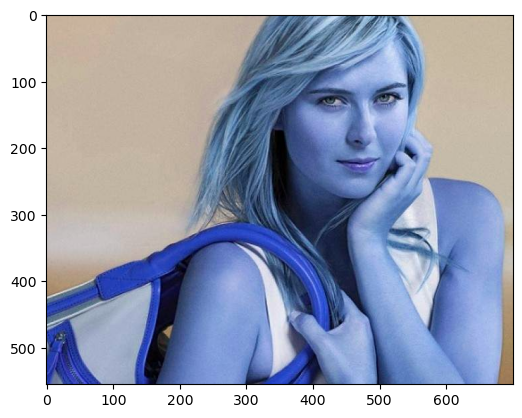

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

In [7]:
gray.shape

(555, 700)

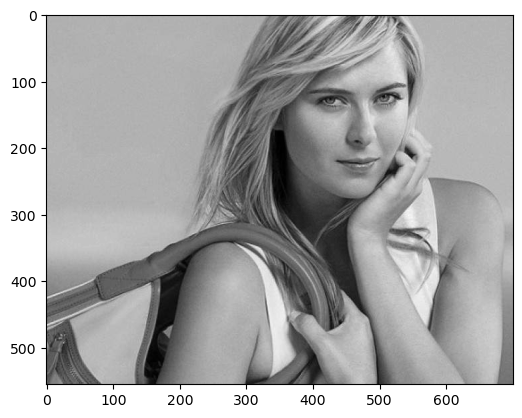

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\Nandhu\OneDrive\Desktop\Projects\SportsPersonClassifier\model\opencv\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\Nandhu\OneDrive\Desktop\Projects\SportsPersonClassifier\model\opencv\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray)
faces

array([[355,  39, 230, 230]])

the array returns x,y,height and  width

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(355, 39, 230, 230)

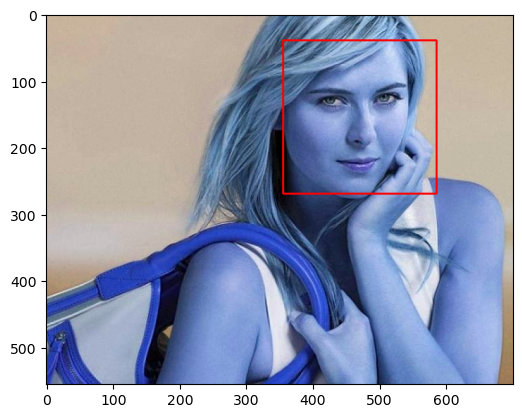

In [11]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

[[180 163  24  24]
 [132  65  45  45]
 [ 98 143  25  25]
 [ 46  64  54  54]]


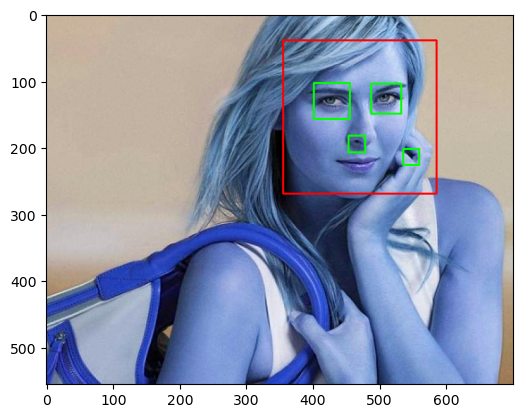

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

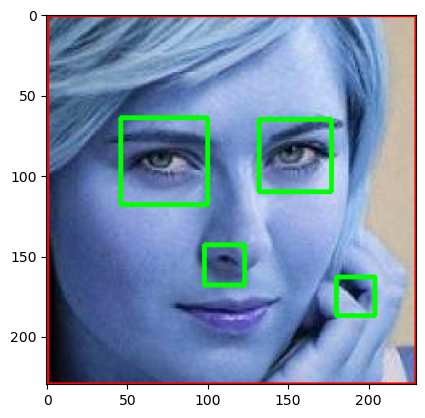

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

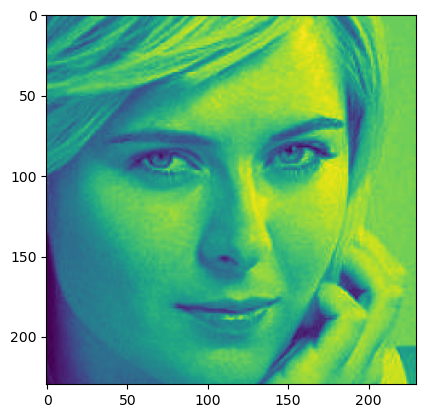

In [14]:
plt.imshow(roi_gray)

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

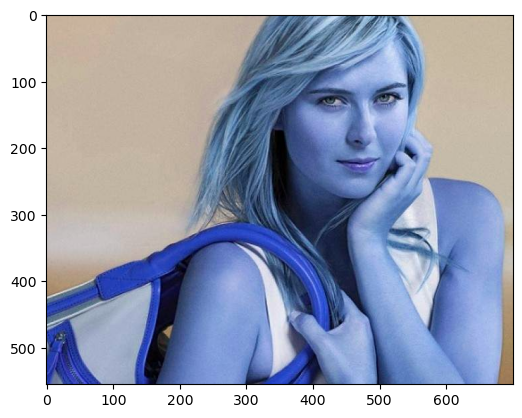

In [16]:
original_image = cv2.imread(path)
plt.imshow(original_image)

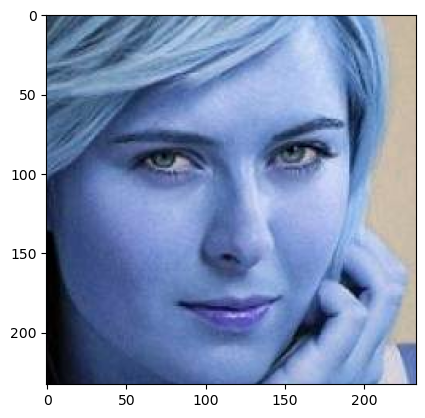

In [17]:
cropped_img =  get_cropped_image_if_2_eyes(path)
plt.imshow(cropped_img)

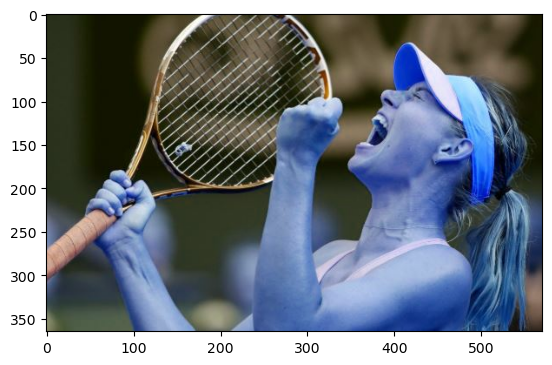

In [18]:
img2 = cv2.imread(r'C:\Users\Nandhu\OneDrive\Desktop\Projects\SportsPersonClassifier\model\test_images\sharapova2.JPG')
plt.imshow(img2)

In [19]:
cropped_img2 =  get_cropped_image_if_2_eyes(r'C:\Users\Nandhu\OneDrive\Desktop\Projects\SportsPersonClassifier\model\test_images\sharapova2.JPG')
cropped_img2

In [20]:
path_to_data = r'C:\Users\Nandhu\OneDrive\Desktop\Projects\SportsPersonClassifier\model\dataset\\'
path_to_cr_data = r'C:\Users\Nandhu\OneDrive\Desktop\Projects\SportsPersonClassifier\model\dataset\cropped\\'

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\\\cropped',
 'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\\\lionel_messi',
 'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\\\maria_sharapova',
 'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\\\roger_federer',
 'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\\\serena_williams',
 'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\\\virat_kohli']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    print(celebrity_name)
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
#             print(cropped_folder)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [65]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi': ['C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi\\lionel_messi1.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi\\lionel_messi10.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi\\lionel_messi11.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi\\lionel_messi12.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi\\lionel_messi13.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi\\lionel_messi14.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonC

example of how the celebrity_file_names_dict will look
{
    'lionel_messi': [
        './dataset/cropped/messi1.png',
        './dataset/cropped/messi2.png',
        './dataset/cropped/messi3.png',
    ],
    'virat_kohli': [
        './dataset/cropped/virat_kohli1.png',
        './dataset/cropped/virat_kohli2.png',
        './dataset/cropped/virat_kohli3.png',
    ],
}

In [35]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype Conversions
    #Convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #Convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    #Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0 
    
    #Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

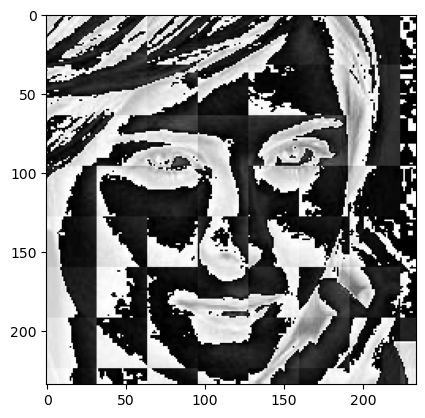

In [36]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [37]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi/lionel_messi1.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi/lionel_messi2.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi/lionel_messi3.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi/lionel_messi4.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi/lionel_messi5.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi/lionel_messi6.png',
  'C:\\Users\\Nandhu\\OneDrive\\Desktop\\Projects\\SportsPersonClassifier\\model\\dataset\\cropped\\\\lionel_messi/lionel_messi7.png',
  'C:\\Users\\Nandhu\\O

In [45]:
class_dict = {}
count = 0
for i in celebrity_file_names_dict.keys():
    class_dict[i] = count
    count += 1
class_dict
    

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [49]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_image = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_image = np.vstack((scalled_raw_image.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_image)
        y.append(class_dict[celebrity_name])
        
        
        

In [50]:
len(X)

187

In [51]:
len(y)

187

In [53]:
len(X[0])

4096

In [54]:
32*32*3 +32*32

4096

In [58]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [60]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

In [62]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

converting to float becoz sklearn lib gives warning for integers. Still integers can be used

In [69]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8297872340425532

In [71]:
len(X_test)

47

In [74]:
pipe.predict([X[30]])

array([3])

In [76]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.78      0.70      0.74        10
           2       0.89      1.00      0.94         8
           3       0.75      0.50      0.60         6
           4       0.90      0.82      0.86        11
           5       0.80      1.00      0.89        12

    accuracy                           0.83        47
   macro avg       0.82      0.80      0.80        47
weighted avg       0.83      0.83      0.82        47



In [77]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [78]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [79]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.728571,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.571429,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.707143,{'logisticregression__C': 1}


In [81]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [82]:
best_estimators['svm'].score(X_test,y_test)

0.8085106382978723

In [83]:
best_estimators['random_forest'].score(X_test,y_test)

0.6382978723404256

In [84]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.851063829787234

In [85]:
best_clf = best_estimators['svm']

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  1,  1,  1],
       [ 0,  8,  0,  0,  0],
       [ 2,  0,  3,  1,  0],
       [ 0,  1,  0,  9,  1],
       [ 0,  0,  1,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

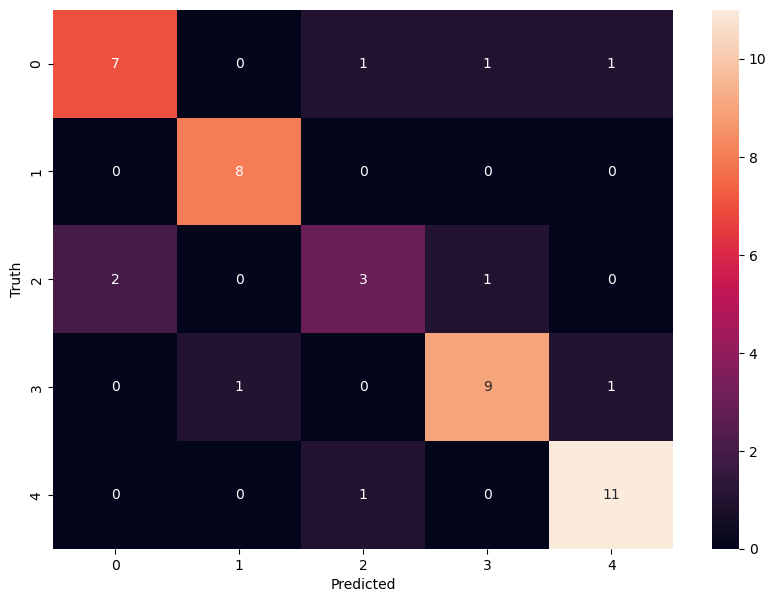

In [87]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [88]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [89]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))